**Riemann Sums**

A Riemann Sum is a certain kind of approximation of an integrail by a finite sum. <br> <br>
<font color="green"> Deffinition </font> 
Let $ f:[a,b] \rightarrow R $ be defined on a closed interval  $ [a,b] \in R $ and $ P =  [ [x_0,x_1],[x_1,x_2],...,[x_{n-1},x_n] ]$ be a partition of an Interval  where $ a =x_0 < x_1< x_2 < .... < x_{n-1} <x_n = b $ ( x is monotonically increasing) <br>

We define a Reimann sum ( $S$ ) of $ f(x) $ over the interval $ I $  with partion  $ P $  as : <br>
$$ S = \sum_{i=1}^n f(x_i^*)  \Delta x_i$$
Where: 
<br>
$ x_i = a + i*\Delta x  $ ................................. $ x_i  $ . incrementes in $ *\Delta x  $ steps.
<br>
$ x_i^* \in [x_{i-1},x_i] $.................................... $ x_i^* $ can be any point in $[x_{i-1},x_i]$.
<br>
$\Delta x =  x_i - x_{i-1}  = \frac{ b-a}{n}$.......................$\Delta x $ depends on $ Inf(f(X)) $ , $ Sup(f(x)) $ and the number of points $ n $.
<br>

It does not matter which point $ x_i^* $ in the interval $ [x_{i-1},x_i] $ is taken,  when  the differnece of width of the summands $  \Delta x $ approaches zero, so does the difference between any two points in the interval.

$$\lim_{\Delta x \rightarrow 0} \rightarrow  x_{i-1} - x_i = 0$$

<br>

**Riemann Sums:**
<ol>
    <li> Left Riemann Sum: $ x_i^* = x_{i-1}$</li>
    <li> Right Riemann Sum: $ x_i^* = x_{i}$</li>
    <li> Middle Riemann Sum: $ x_i^* = \frac{x_{i}+x_{i-1}}{2} $ </li>
   
  
</ol>

**Deffinition of integral by Right Riemann Sum**
$$\lim_{n \rightarrow \infty} \sum_{i=1}^n f(x_i^*) \Delta x = \int_a^b f(x) dx = \lim_{\Delta x \to 0}  \sum_{i=1}^n f(x_i^*) \Delta x $$

If we make the substitions for $ x_i $ and $ \Delta x $:

$$ \int_a^b f(x) dx = \lim_{\Delta x \to 0}  \sum_{i=1}^n f( a + (\frac{b-a}{n})i )*
( \frac{b-a}{n} )$$

**Deffinition of integral by Middle Riemann Sum**

$$ \int_a^b f(x) dx = \lim_{\Delta x \to 0}  \sum_{i=0}^n f( \frac{a + (\frac{b-a}{n})i + a + (\frac{b-a}{n})(i+1)}{2})*
( \frac{b-a}{n} )$$

**Example:**
Obtain the Riemann sumation (integral approximation) of the function $ f(x) = e^{2x} $ for the close interval $[2,5]$. <br>Analitical solution: $ F(x) = 2e^{2x} |_2^5= 2e^{(2*5)} - 2e^{(2*2)} = 282.048..$ 

In [1]:
# Import Libraries
import numpy as np
from math import *
import matplotlib.pyplot as plt
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [48]:
# Intialization for Right Riemann Sum (ONLY FOR PLOT )
F_analytical= 2*(np.exp(5) - np.exp(2)) # Analytical Solution
a = 2        # inf[f(x)]  Lower boundary
b = 5        # sup[f(x)]  Upper boundary
n = 20       # Number of points
dx = (b-a)/n # dx by definition
#SUMMARY
print(f"Interval: {a} to {b}, number of points: {n}, dx: {dx}, Analytical Solution: {F_analytical}")

Interval: 2 to 5, number of points: 20, dx: 0.15, Analytical Solution: 282.0482060072919


In [49]:
# Initialization of xi (this is only used in order to plot the function)
# by definition xi = a + dxi
x = []
xi = a
for i in range(0,20+1):
    xi = a + dx*i
    x.append(xi)
x = np.array(x) # convertion to numpy array (for better performance)
print(x)

[2.   2.15 2.3  2.45 2.6  2.75 2.9  3.05 3.2  3.35 3.5  3.65 3.8  3.95
 4.1  4.25 4.4  4.55 4.7  4.85 5.  ]


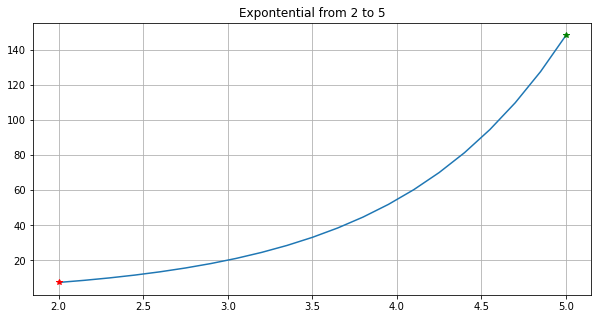

In [50]:
# Plot function
#f_x = np.exp(x)             # Definition of f(x)
plt.figure(figsize=(10,5))  # Adjust Fig size
plt.plot(x,f_x)             # plot function x,f(x)
plt.plot(a,np.exp(a),"*r")  # inf[f(x)]  Lower boundary
plt.plot(b,np.exp(b),"*g")  # sup[f(x)]  Upper boundary

# Cutomize output 
plt.title("Expontential from 2 to 5")
plt.grid()
plt.show()

#### Right Reimman Sum

In [60]:
# Right Riemman Sum from scratch 
# Right Reimman Sum
F=0 # Init Integral 
a = 2   # inf[f(x)]  Lower boundary
b = 5   # sup[f(x)]  Upper boundary
n=int(input("enter the number of points n=")) # Number of points

for i in range(0,n+1): 
    fx = 2*np.exp(  a + i*(b-a)/n  ) # Evaluate function in x_i 
    F+= fx*( (b-a)/n )               # Multiply by dx (Area of rectangle)

print(f"Analytical Solution: {round(F_analytical,4)} Reimman Sumation with {n} points: {round(F,4)}, Absolute Error: {abs(F_analytical -F)}")

enter the number of points n=100
Analytical Solution: 282.0482 Reimman Sumation with 100 points: 286.7434, Absolute Error: 4.69521975419832


#### Middle Riemman Sum

In [61]:
# Reimman Sum
a = 2   # inf[f(x)]  Lower boundary
b = 5   # sup[f(x)]  Upper boundary
F=0     # Init Integral
n=int(input("enter the number of points n=")) # Number of points
x = np.linspace(a,b,n) # Create vector from a to b with n points (a, a+dx, a+2dx, ..., b-dx, b)
for i in range(0,len(x)):
    xi_prev = x[i]
    try:
        xi = x[i+1]
    except:
        continue
    middle_point = (xi_prev +xi)/2 # Obtain middle point 
    fx = 2*np.exp(middle_point)    # Evaluate function in middle point
    F+= fx*( (b-a)/n )             # Multiply by dx (Area of rectangle)

print(f"Analytical Solution: {round(F_analytical,4)} Reimman Sumation with {n} points: {round(F,4)}, Absolute Error: {abs(F_analytical -F)}")

enter the number of points n=100
Analytical Solution: 282.0482 Reimman Sumation with 100 points: 279.217, Absolute Error: 2.8311654181069343


#### Reimman Sum number of points analysis

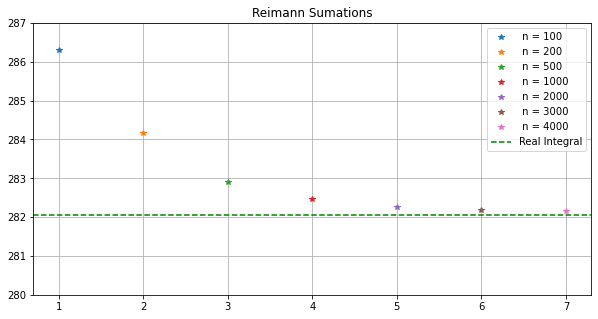

In [24]:
plt.figure(figsize=(10,5))  # Adjust Fig size
values = [100,200,500,1000,2000,3000,4000]
j=0
for v in values:
    F =0
    n=v
    for i in range(0+1,n+1):
         F+= (2*np.exp(( a + i*(b-a)/n )))*((b-a)/n)
    
    j = j + 1
    plt.plot(j,F,"*",label=f" n = {v}")
    
plt.axhline(y=F_analytical, color='green', linestyle='--', label="Real Integral")

# Cutomize output 
plt.legend()    # Add legends
plt.grid()      # Turn on grid
plt.title("Reimann Sumations") # Set Title
plt.ylim([280,287])
plt.show()      # Print 
